In [194]:
%config Completer.use_jedi = False

In [195]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import re

(예제) 다음이 주어졌을 때, word와 document를 2차원으로 그려보고, python 과 가까운 단어를 순서대로 나열해보라.

``` python
example = [
    "Machine learning is super fun",
    "Python is super, super cool",
    "Statistics is cool, too",
    "Data science is fun",
    "Python is great for machine learning",
    "I like football",
    "Football is great to watch"
]```

``` python
corpus = OrderedDict(
    {
        'cool':0, 
        'data':1,
        'football':2,
        'fun':3,
        'great':4,
        'learning':5,
        'like':6,
        'machine':7,
        'python':8,
        'science':9,
        'statistics':10,
        'super':11,
        'watch':12
    }
)```

In [198]:
example = [
    "Machine learning is super fun",
    "Python is super, super cool",
    "Statistics is cool, too",
    "Data science is fun",
    "Python is great for machine learning",
    "I like football",
    "Football is great to watch"
]

In [199]:
corpus = OrderedDict(
    {
        'cool':0, 
        'data':1,
        'football':2,
        'fun':3,
        'great':4,
        'learning':5,
        'like':6,
        'machine':7,
        'python':8,
        'science':9,
        'statistics':10,
        'super':11,
        'watch':12
    }
)

### example을 쪼개서 문장들을 만들어준다

In [200]:
d1 = example[0]
d2 = example[1]
d3 = example[2]
d4 = example[3]
d5 = example[4]
d6 = example[5]
d7 = example[6]

In [201]:
#문장들 전처리하는 과정
def parse_document(doc):
    tokens = doc.split(' ')
    tokens = map(str.lower, tokens)
    tokens = list(tokens)
    tokens = [re.sub(r'[^a-zA-Z0-9-]', '', token) for token in tokens]
    
    return tokens

In [202]:
d1_tokens = parse_document(d1)
d2_tokens = parse_document(d2)
d3_tokens = parse_document(d3)
d4_tokens = parse_document(d4)
d5_tokens = parse_document(d5)
d6_tokens = parse_document(d6)
d7_tokens = parse_document(d7)


print(d1_tokens)
print(d2_tokens)
print(d3_tokens)
print(d4_tokens)
print(d5_tokens)
print(d6_tokens)
print(d7_tokens)


['machine', 'learning', 'is', 'super', 'fun']
['python', 'is', 'super', 'super', 'cool']
['statistics', 'is', 'cool', 'too']
['data', 'science', 'is', 'fun']
['python', 'is', 'great', 'for', 'machine', 'learning']
['i', 'like', 'football']
['football', 'is', 'great', 'to', 'watch']


In [203]:
for v, i in corpus.items():
    print(v, i)

cool 0
data 1
football 2
fun 3
great 4
learning 5
like 6
machine 7
python 8
science 9
statistics 10
super 11
watch 12


In [204]:
# Document vector를 생성하는 함수
def get_doc_vector(tokens):
    doc_vec = [1 if v in tokens else 0 for v, i in corpus.items()]
    return doc_vec

In [205]:
d1_vec = get_doc_vector(d1_tokens)
d2_vec = get_doc_vector(d2_tokens)
d3_vec = get_doc_vector(d3_tokens)
d4_vec = get_doc_vector(d4_tokens)
d5_vec = get_doc_vector(d5_tokens)
d6_vec = get_doc_vector(d6_tokens)
d7_vec = get_doc_vector(d7_tokens)

print(d1_vec)
print(d2_vec)
print(d3_vec)
print(d4_vec)
print(d5_vec)
print(d6_vec)
print(d7_vec)

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]


In [206]:
A = np.array([d1_vec, d2_vec, d3_vec, d4_vec, d5_vec, d6_vec, d7_vec])
A

array([[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

In [207]:
# document matrix (공통 단어가 문서에서 몇번 나왔는지?)
doc_mat = np.dot(A, A.T)
doc_mat

array([[4, 1, 0, 1, 2, 0, 0],
       [1, 3, 1, 0, 1, 0, 0],
       [0, 1, 2, 0, 0, 0, 0],
       [1, 0, 0, 3, 0, 0, 0],
       [2, 1, 0, 0, 4, 0, 1],
       [0, 0, 0, 0, 0, 2, 1],
       [0, 0, 0, 0, 1, 1, 3]])

In [208]:
# word matrix (문서에서 단어가 몇번 나왔는지?)
word_mat = np.dot(A.T, A)
word_mat

array([[2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

In [209]:
#A 행렬을 SVD로 바로 나눠준다.
U, sig, V_T = np.linalg.svd(A)

## word_eigen vector를 만들때는 V_T.T(A_T*A)를 사용해야 한다.
* __주의__ : `word_eigen_val, word_eigen_vec = np.linalg.eig(np.dot(A.T, A))`를 사용하게 되면 word_eigen_vec의 순서가 엉망이 되어버린다.

In [224]:
word_eigen_val, word_eigen_vec_dot = np.linalg.eig(np.dot(A.T, A))

In [228]:
word_eigen_vec = V_T.T[:, :2]

In [254]:
ata = np.dot(A.T, A)

In [259]:
np.dot(A.T, A) is ata.T

False

In [260]:
ata is ata.T

False

In [269]:
V_T

array([[-0.16280159, -0.06365747, -0.08153494, -0.30698056, -0.31165761,
        -0.48744948, -0.01400371, -0.48744948, -0.37896663, -0.06365747,
        -0.02796134, -0.37816335, -0.06753123],
       [ 0.10726903,  0.17803733, -0.56801159,  0.33609413, -0.50426555,
         0.02510749, -0.19669535,  0.02510749, -0.06282621,  0.17803733,
         0.03714593,  0.2281799 , -0.37131624],
       [ 0.56753028, -0.31234068, -0.15891516, -0.4400973 , -0.06500102,
        -0.09980894, -0.06596646, -0.09980894,  0.35989337, -0.31234068,
         0.23558459,  0.20418907, -0.0929487 ],
       [-0.47167366, -0.32694004, -0.38342851, -0.27204415,  0.06438076,
         0.29342062, -0.20928454,  0.29342062,  0.02430195, -0.32694004,
        -0.25745088, -0.15932689, -0.17414397],
       [ 0.09339555,  0.30586704, -0.335503  , -0.08150866,  0.42490916,
        -0.08435367, -0.45739012, -0.08435367,  0.26909174,  0.30586704,
         0.12732584, -0.421306  ,  0.12188713],
       [ 0.15827037, -0.149105

In [265]:
ata == ata.T

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,

In [257]:
ata.T

array([[2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

In [253]:
V_T.T is V_T

False

In [248]:
aat.T

array([[4, 1, 0, 1, 2, 0, 0],
       [1, 3, 1, 0, 1, 0, 0],
       [0, 1, 2, 0, 0, 0, 0],
       [1, 0, 0, 3, 0, 0, 0],
       [2, 1, 0, 0, 4, 0, 1],
       [0, 0, 0, 0, 0, 2, 1],
       [0, 0, 0, 0, 1, 1, 3]])

In [229]:
word_eigen_vec # 이걸 사용 권장

array([[-0.16280159,  0.10726903],
       [-0.06365747,  0.17803733],
       [-0.08153494, -0.56801159],
       [-0.30698056,  0.33609413],
       [-0.31165761, -0.50426555],
       [-0.48744948,  0.02510749],
       [-0.01400371, -0.19669535],
       [-0.48744948,  0.02510749],
       [-0.37896663, -0.06282621],
       [-0.06365747,  0.17803733],
       [-0.02796134,  0.03714593],
       [-0.37816335,  0.2281799 ],
       [-0.06753123, -0.37131624]])

In [227]:
word_eigen_vec_dot[:,:2] #값잉 위와 다른 것을 확인할 수 있다.

array([[-0.16280159, -0.10726903],
       [-0.06365747, -0.17803733],
       [-0.08153494,  0.56801159],
       [-0.30698056, -0.33609413],
       [-0.31165761,  0.50426555],
       [-0.48744948, -0.02510749],
       [-0.01400371,  0.19669535],
       [-0.48744948, -0.02510749],
       [-0.37896663,  0.06282621],
       [-0.06365747, -0.17803733],
       [-0.02796134, -0.03714593],
       [-0.37816335, -0.2281799 ],
       [-0.06753123,  0.37131624]])

In [230]:
word_eigen_val

array([ 6.82238103e+00,  3.88777334e+00,  3.40902971e+00,  2.83209187e+00,
        1.73351605e+00,  1.23802682e+00,  1.07718117e+00,  3.29061336e-16,
       -3.60373074e-16, -1.65660688e-16, -8.71662318e-17,  5.80487724e-17,
        4.33698469e-17])

In [56]:
word_eigen_vec[:,:2]

array([[-0.16280159, -0.10726903],
       [-0.06365747, -0.17803733],
       [-0.08153494,  0.56801159],
       [-0.30698056, -0.33609413],
       [-0.31165761,  0.50426555],
       [-0.48744948, -0.02510749],
       [-0.01400371,  0.19669535],
       [-0.48744948, -0.02510749],
       [-0.37896663,  0.06282621],
       [-0.06365747, -0.17803733],
       [-0.02796134, -0.03714593],
       [-0.37816335, -0.2281799 ],
       [-0.06753123,  0.37131624]])

In [231]:
np.sqrt(word_eigen_val)

/Users/sanghyub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([2.61196880e+00, 1.97174373e+00, 1.84635579e+00, 1.68288201e+00,
       1.31663057e+00, 1.11266654e+00, 1.03787339e+00, 1.81400479e-08,
                  nan,            nan,            nan, 7.61897450e-09,
       6.58557871e-09])

In [232]:
sig

array([2.6119688 , 1.97174373, 1.84635579, 1.68288201, 1.31663057,
       1.11266654, 1.03787339])

### k = 2

In [233]:
word_vec = np.dot(np.diag(sig[:2]), word_eigen_vec[:, :2].T)

In [234]:
word_vec

array([[-0.42523269, -0.16627132, -0.21296672, -0.80182365, -0.81403996,
        -1.27320282, -0.03657726, -1.27320282, -0.98984902, -0.16627132,
        -0.07303416, -0.98775086, -0.17638947],
       [ 0.21150705,  0.35104399, -1.11997329,  0.66269149, -0.99428243,
         0.04950553, -0.38783282,  0.04950553, -0.12387718,  0.35104399,
         0.07324226,  0.44991228, -0.73214047]])

In [235]:
w_x = word_vec[0]
w_y = word_vec[1]

In [236]:
w_x.shape

(13,)

In [237]:
w_y.shape

(13,)

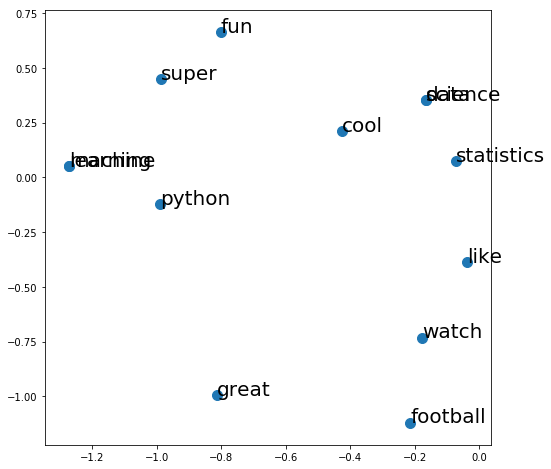

In [270]:
mpl.rcParams['figure.figsize'] = (8, 8)

fig, ax = plt.subplots()

# Scatter
ax.scatter(w_x, w_y, s=100)

# Scatter에 라벨링을 한다.
for i, txt in enumerate(corpus.keys()):
    ax.annotate(txt, (w_x[i], w_y[i]), fontsize=20)  # free와 live가 겹쳐지는 위치

## Document Eigen Vectors

In [78]:
#doc_eigen_val, doc_eigen_vec = np.linalg.eig(np.dot(A, A.T))

In [271]:
doc_eigen_vec = U[:, : 2]

In [274]:
sig

array([2.6119688 , 1.97174373, 1.84635579, 1.68288201, 1.31663057,
       1.11266654, 1.03787339])

In [277]:
doc_vec = np.dot(doc_eigen_vec, np.diag(sig[:2]))

In [278]:
doc_x = doc_vec[:, 0]
doc_y = doc_vec[:, 1]

In [279]:
doc_x

array([-1.66004286, -0.91993157, -0.19076294, -0.43429549, -1.6655232 ,
       -0.09553865, -0.46072378])

In [280]:
doc_y

array([ 0.614489  ,  0.27262272,  0.14441497,  0.69216879, -0.51687678,
       -0.76470694, -1.44359338])

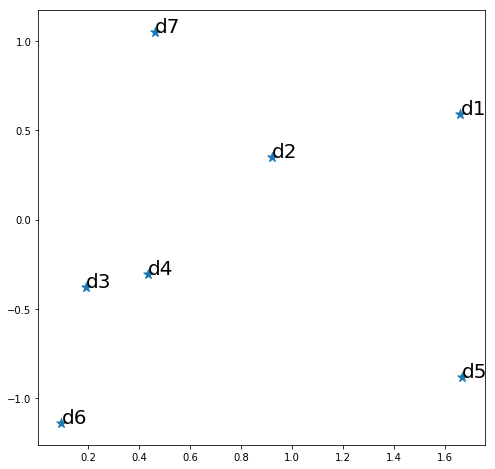

In [88]:
fig, ax = plt.subplots()

# Scatter
ax.scatter(doc_x, doc_y, marker='*', s=100)

# Scatter에 라벨링을 한다.
for i, txt in enumerate(['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7']):
    ax.annotate(txt, (doc_x[i], doc_y[i]), fontsize=20)

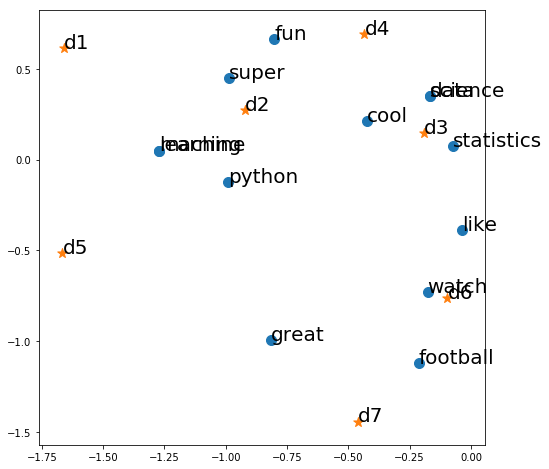

In [281]:
fig, ax = plt.subplots()
ax.scatter(w_x, w_y, s=100)
for i, txt in enumerate(corpus.keys()):
    ax.annotate(txt, (w_x[i], w_y[i]), fontsize=20)
    
ax.scatter(doc_x, doc_y, marker='*', s = 100)
for i, txt in enumerate(['d1','d2','d3','d4','d5','d6','d7']):
    ax.annotate(txt, (doc_x[i], doc_y[i]), fontsize=20)

## Cosine Similarity를 이용하자

$\text{Cosine Similarity} = \frac{d_i q}{|d_i| |q|}$

In [282]:
def get_consine_similarity(doc, query):
    dot_prod = np.dot(doc, query)
    len_doc = np.sqrt(sum(doc ** 2))
    len_query = np.sqrt(sum(query ** 2))
    
    return dot_prod / (len_doc * len_query)

In [283]:
docs = [d1, d2, d3, d4, d5, d6, d7]

In [284]:
doc_vec

array([[-1.66004286,  0.614489  ],
       [-0.91993157,  0.27262272],
       [-0.19076294,  0.14441497],
       [-0.43429549,  0.69216879],
       [-1.6655232 , -0.51687678],
       [-0.09553865, -0.76470694],
       [-0.46072378, -1.44359338]])

### Query

In [287]:
# Query : die, dagger
q1 = word_vec[:, 7]
print('machine', q1)

q2 = word_vec[:, 8]
print('python', q2)

q3 = word_vec[:, 5]
print('learning', q3)

machine [-1.27320282  0.04950553]
python [-0.98984902 -0.12387718]
learning [-1.27320282  0.04950553]


In [288]:
query = (q1 + q2 + q3) / 3

In [290]:
print('machine leaerning python: ', query)

machine leaerning python:  [-1.17875156 -0.00828871]


In [291]:
result = {}
for idx, doc in zip(docs, doc_vec):
    result[get_consine_similarity(doc, query)] = idx

In [292]:
result

{0.130945501416146: 'I like football',
 0.31073285924247535: 'Football is great to watch',
 0.5255159978291322: 'Data science is fun',
 0.7930342446275301: 'Statistics is cool, too',
 0.9353474497542472: 'Machine learning is super fun',
 0.9567621655734274: 'Python is super, super cool',
 0.9571262278922466: 'Python is great for machine learning'}

In [293]:
import operator

# 최종결과를 sorting하라!
sorted(result.items(), key=operator.itemgetter(0), reverse=True)

[(0.9571262278922466, 'Python is great for machine learning'),
 (0.9567621655734274, 'Python is super, super cool'),
 (0.9353474497542472, 'Machine learning is super fun'),
 (0.7930342446275301, 'Statistics is cool, too'),
 (0.5255159978291322, 'Data science is fun'),
 (0.31073285924247535, 'Football is great to watch'),
 (0.130945501416146, 'I like football')]

Text(-0.166271,-0.351044,'query_python')

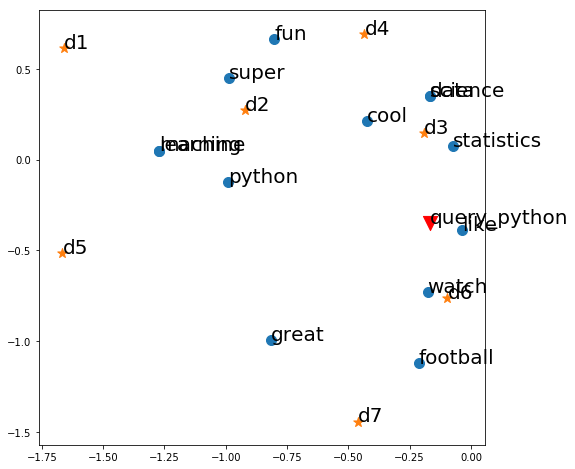

In [294]:
fig, ax = plt.subplots()
ax.scatter(w_x, w_y, s=100)
for i, txt in enumerate(corpus.keys()):
    ax.annotate(txt, (w_x[i], w_y[i]), fontsize=20)
    
ax.scatter(doc_x, doc_y, marker='*', s=100)
for i, txt in enumerate(['d1', 'd2', 'd3', 'd4', 'd5','d6','d7']):
    ax.annotate(txt, (doc_x[i], doc_y[i]), fontsize=20)
    
ax.scatter(query_python[0], query_python[1], marker='v', s=200, color='red')
ax.annotate('query_python', (query_python[0], query_python[1]), fontsize=20)

# 축 방향 scaling 주의